# Linear Regression Analysis:
Problem Statement
Boombikes is bike sharing provider in US which allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. Due to COVID-19 pandemic company has suffered significant reduction in revenue. Company wants to understand demand of bikes and attributing factors for revenue so that post pandemic when business gets to normal company can improve its revenue and normalize the businss. Company wants to analyse following:

To model the demand for shared bikes with the available independent variables.
The model should be built taking this 'cnt' as the target variable.

In [7]:
#import required library for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [8]:
# import data
boombikes = pd.read_csv("day.csv")

In [9]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
boombikes.shape

(730, 16)

In [11]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data understanding, preparation and EDA: To divide boombike data into two type. One for linear regression and second for EDA

In [14]:
#creating copy of dataset for exploratory data analysis
boombikes_eda = boombikes.copy()

#creating copy of dataset for linear regression
boombikes_lr = boombikes.copy()

## Linear Regression analysis

In [37]:
# Creating a new DataFrame by dropping specified columns
boombikes_lr = boombikes.drop(columns=["instant", "dteday", "registered", "casual"])

boombikes_lr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


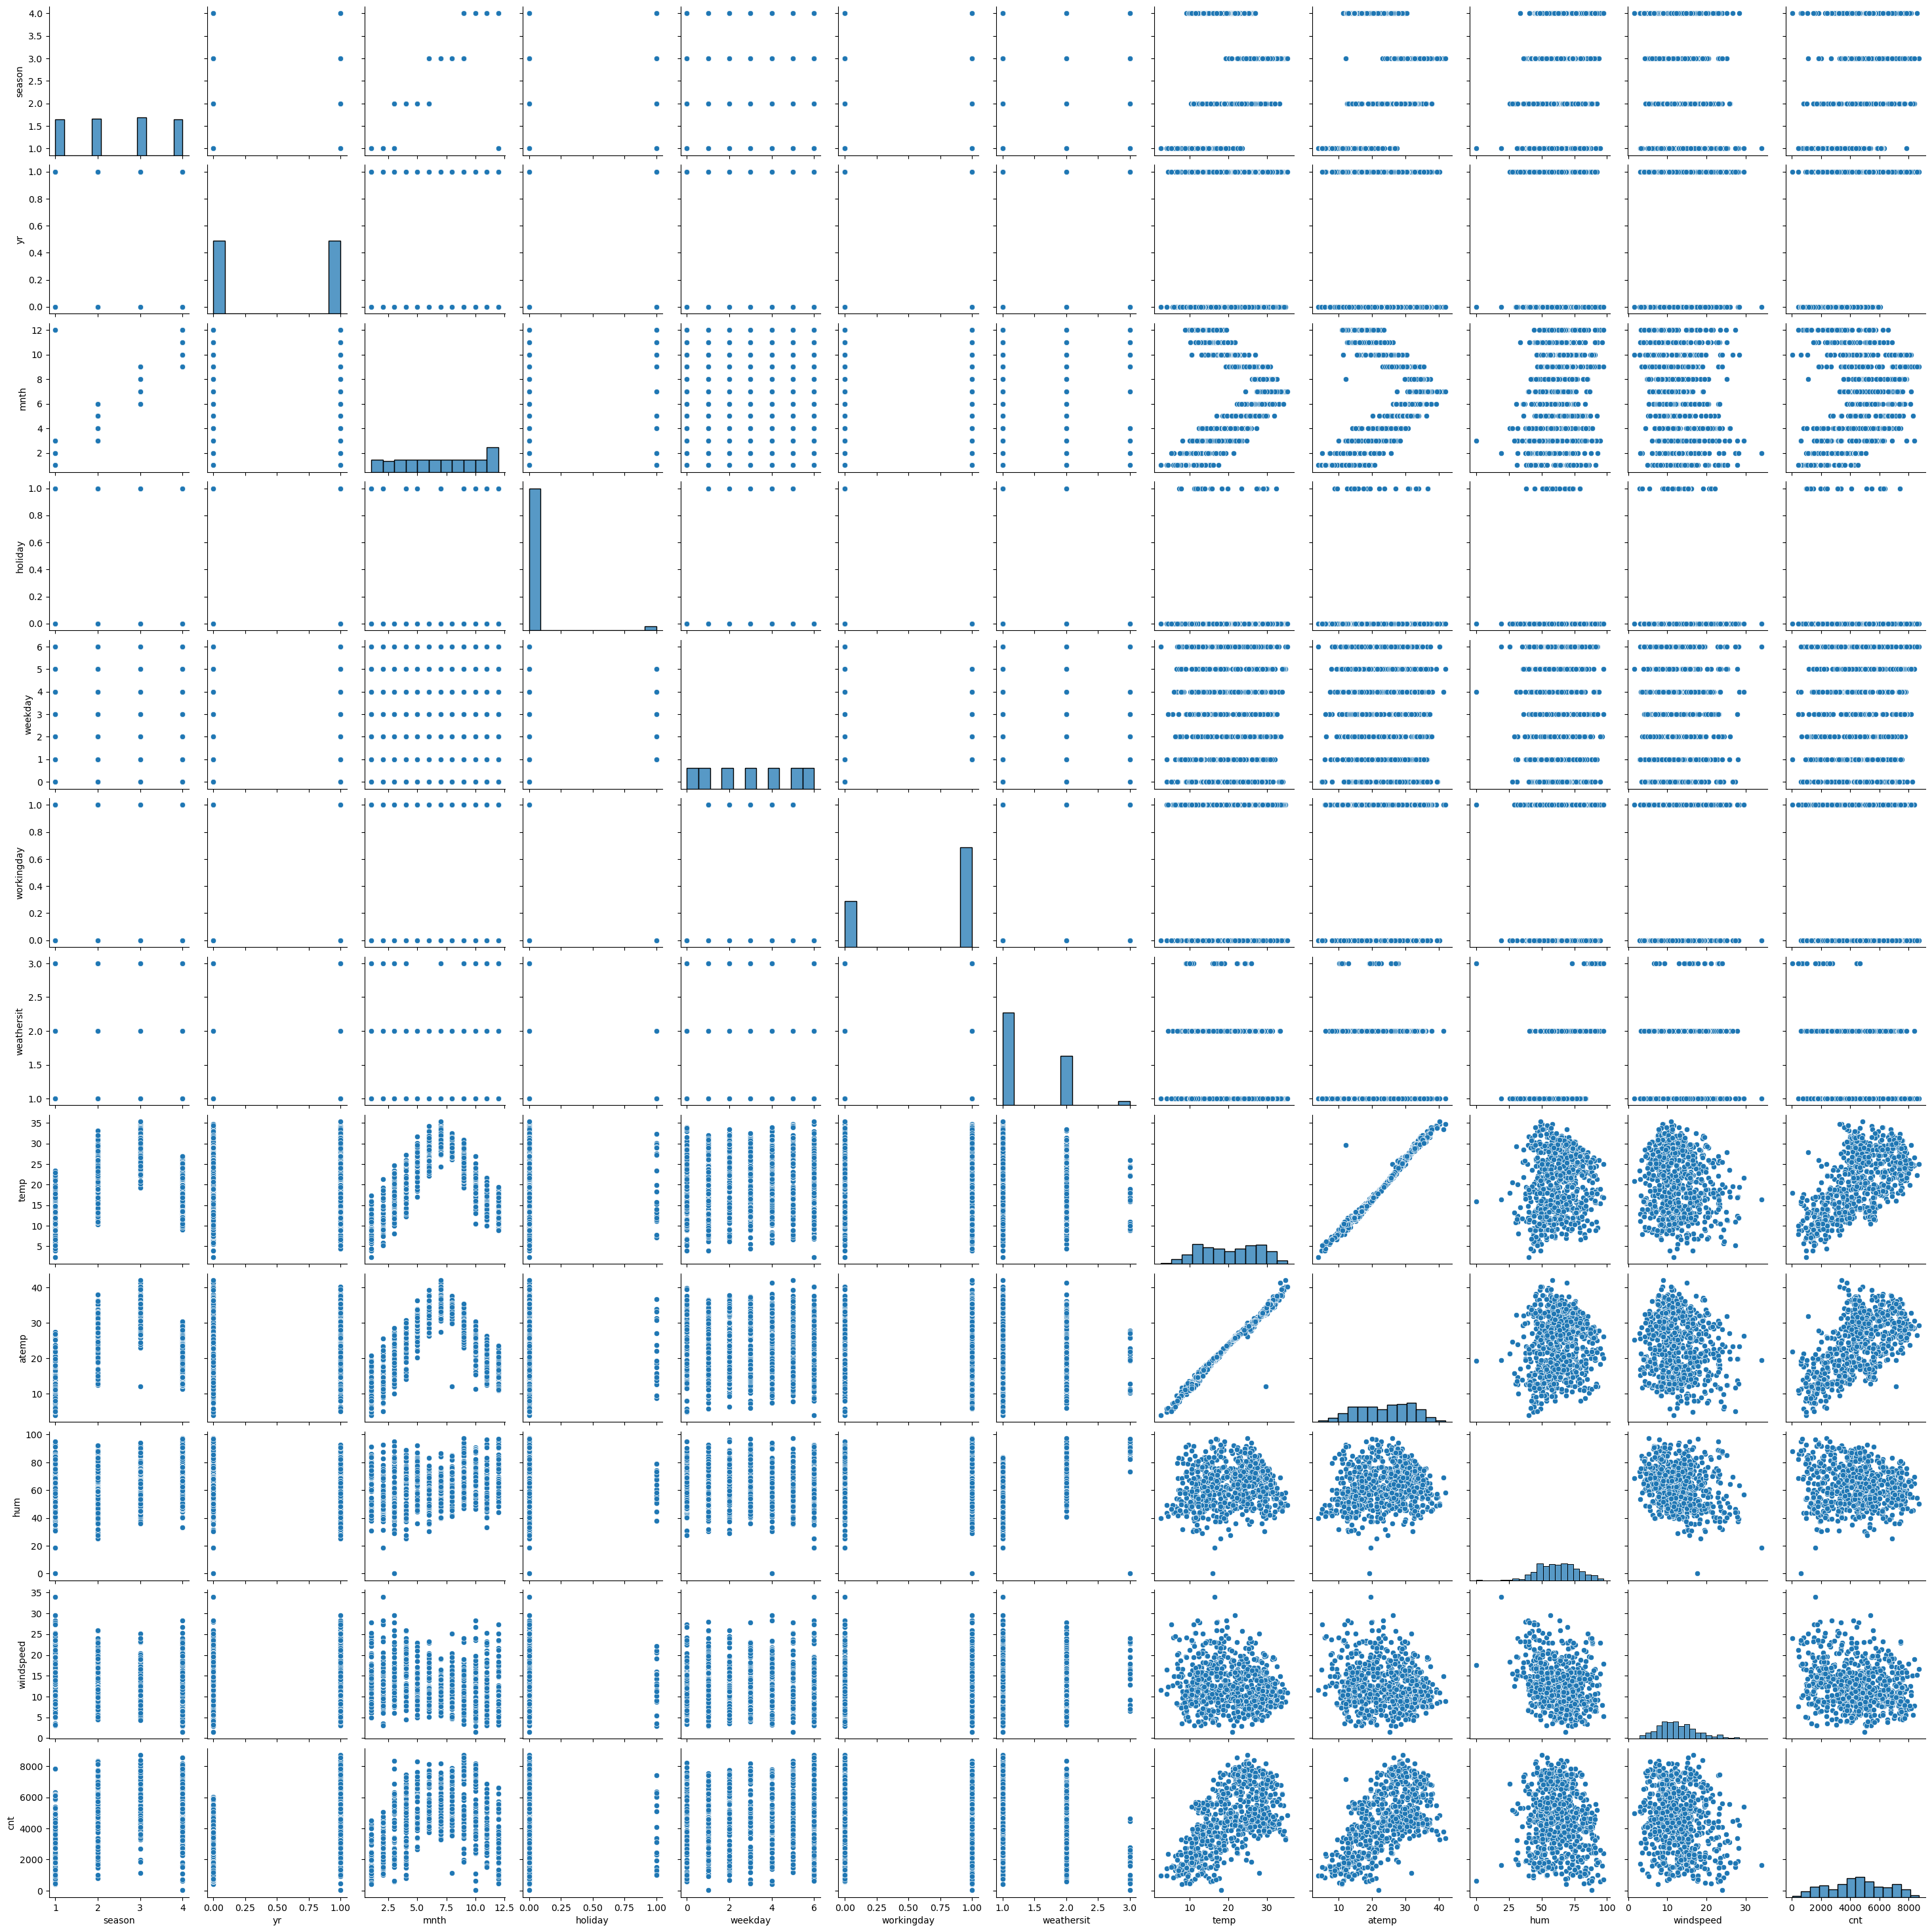

In [36]:
#understand data visually and understand corelation
sns.pairplot(boombikes_lr)
plt.show()

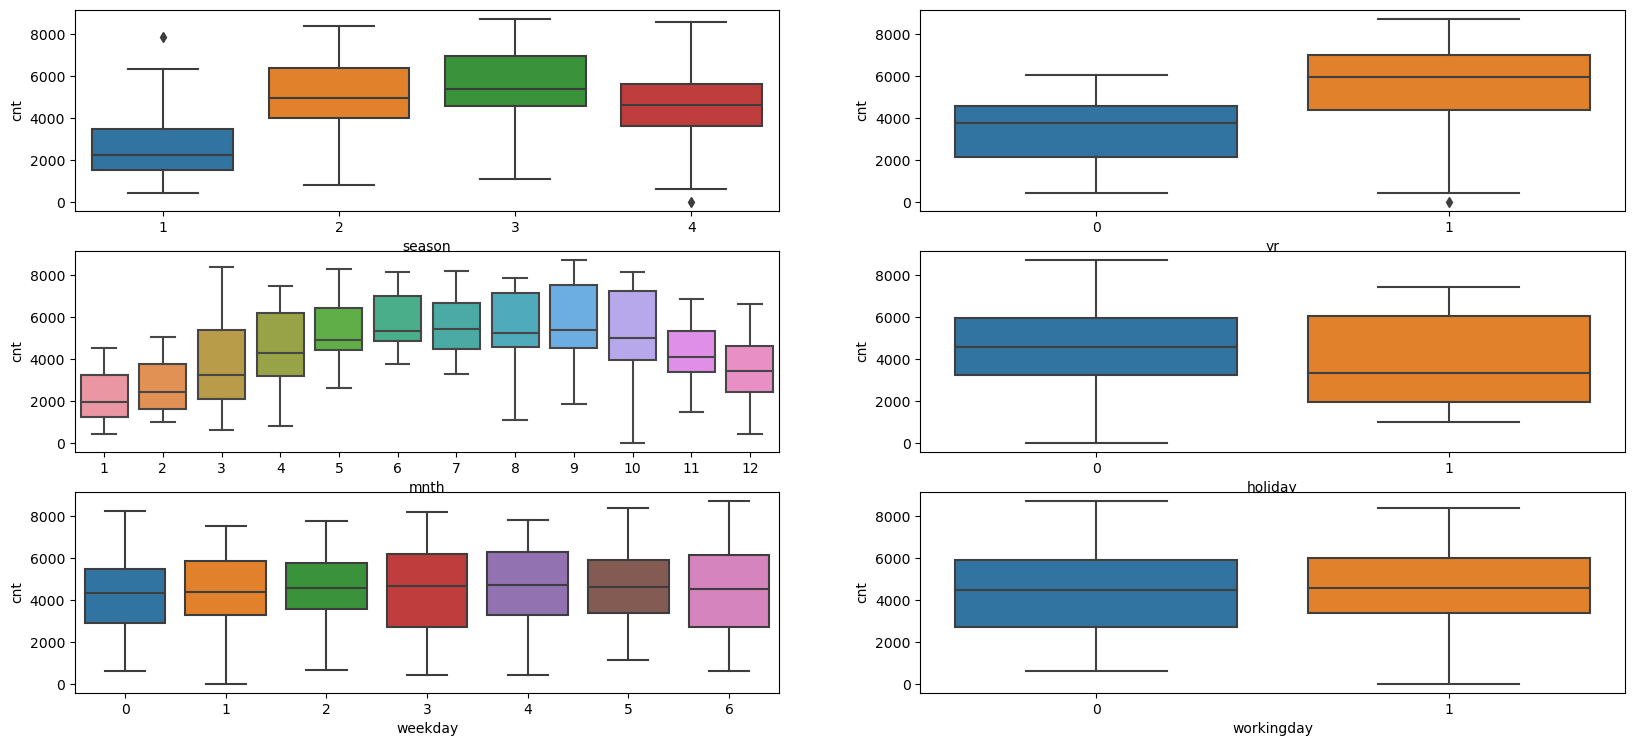

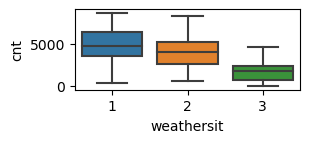

In [39]:
# performing categorical analysis of data
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_lr)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_lr)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_lr)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_lr)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_lr)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_lr)
plt.show()
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_lr)
plt.show()

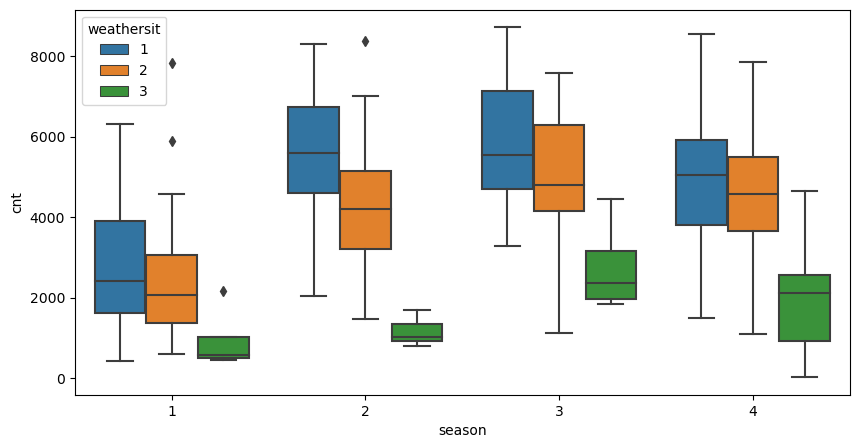

In [40]:
#performing categorical analysis with 2 variable
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = boombikes_lr)
plt.show()

In [41]:
# Creating dummy variables for 'season'
dummines_season = pd.get_dummies(boombikes_lr['season'],prefix='season')
dummines_season = dummines_season.astype(int)
dummines_season.head()

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [42]:
# Creating dummy variables for 'season' and drop 'season_3' and 'season_4'
dummines_season = pd.get_dummies(boombikes_lr['season'], prefix='season').drop(columns=['season_3', 'season_4'])

# Renaming the remaining columns
dummines_season.columns = ['Season_1', 'Season_2']

# Seting Winter values as both Season_1 and Season_2 should be 1 for Winter
dummines_season.loc[boombikes_lr['season'] == 4, ['Season_1', 'Season_2']] = 1

# Converting boolean values to integers
dummines_season = dummines_season.astype(int)

# Combining columns back to the original dataframe
boombikes_lr = pd.concat([boombikes_lr, dummines_season], axis=1)
boombikes_lr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Season_1,Season_2
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0


In [44]:
# Creating dummy variables for 'weathersit'
dummies_weather = pd.get_dummies(boombikes_lr['weathersit'], prefix='weathersit', drop_first=False)
dummies_weather = dummies_weather.astype(int)

# Droping the first column manually
dummies_weather = dummies_weather.iloc[:, 1:]

dummies_weather.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [45]:
# Combing columns back to the original dataframe
boombikes_lr = pd.concat([boombikes_lr, dummies_weather], axis = 1)
boombikes_lr.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Season_1,Season_2,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [46]:
# Creating new DataFrame by dropping season and weathersit categorical columns
bb_final = boombikes_lr.drop(columns=["season", "weathersit"])

bb_final.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Season_1,Season_2,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


## Test - Train split

In [47]:
# Test-Train split
np.random.seed(0)
bb_final_train, bb_final_test = train_test_split(bb_final, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bb_final_train.shape)
print(bb_final_test.shape)

(510, 14)
(219, 14)


In [48]:
scaler = MinMaxScaler()

In [49]:
bb_final_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Season_1,Season_2,weathersit_2,weathersit_3
653,1,10,0,2,1,19.201653,23.0423,55.8333,12.208807,7534,1,1,0,0
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,1,0
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,1,0


In [50]:
#Scalling, transforming and fiting all numerical data
varlist =  ['yr', 'mnth', 'holiday', 'weekday', 'workingday','temp', 'atemp', 'hum', 'windspeed', 'Season_1', 'Season_2', 'weathersit_2','weathersit_3','cnt']

bb_final_train[varlist] = scaler.fit_transform(bb_final_train[varlist])

In [51]:
bb_final_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Season_1,Season_2,weathersit_2,weathersit_3
653,1.0,0.818182,0.0,0.333333,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,1.0,1.0,0.0,0.0
576,1.0,0.545455,0.0,0.333333,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0
426,1.0,0.181818,0.0,1.000000,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,1.0,0.0
728,1.0,1.000000,0.0,0.000000,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0
482,1.0,0.272727,0.0,1.000000,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,1.0,0.0


In [52]:
bb_final_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Season_1,Season_2,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.492157,0.494118,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.500429,0.500456,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


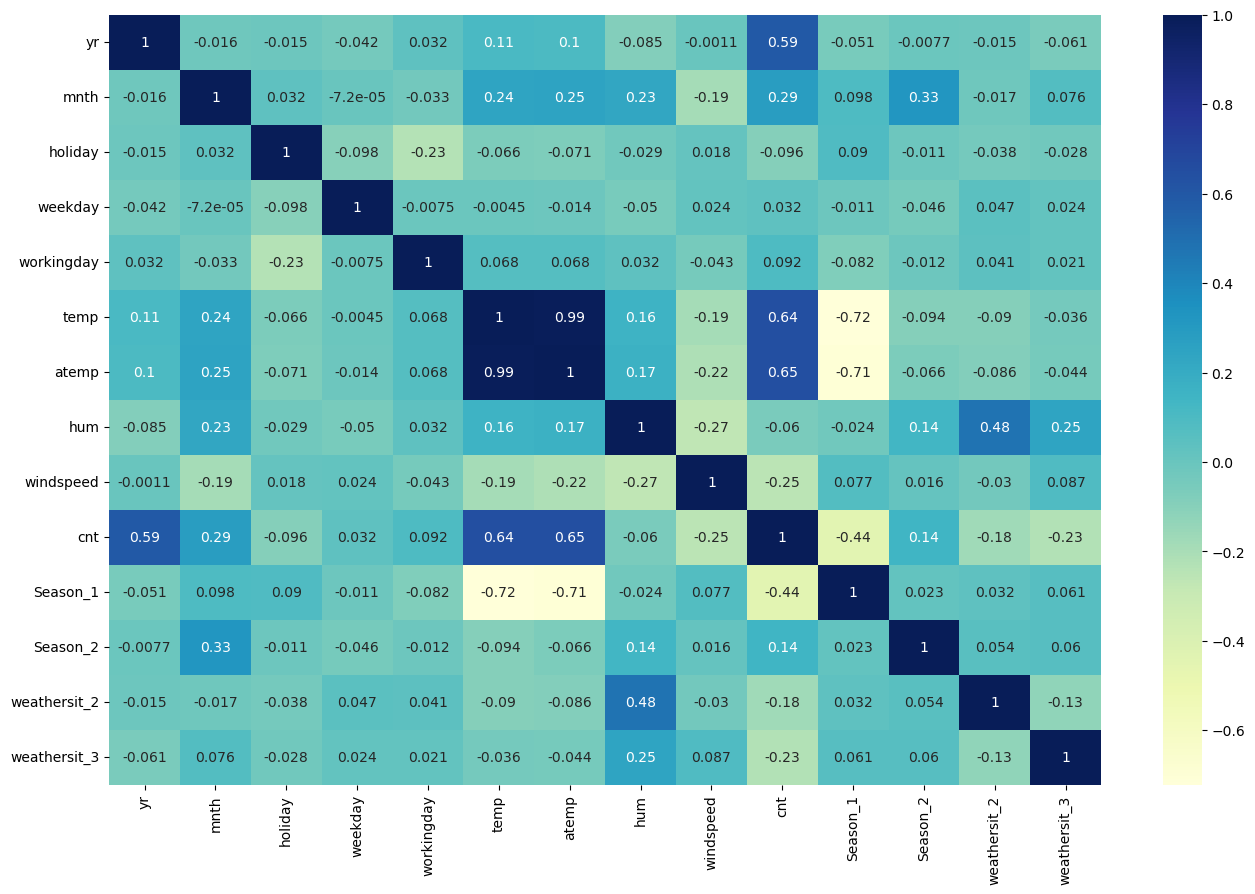

In [53]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(bb_final_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Calculating X and Y sets for the model building

In [55]:
y_train = bb_final_train.pop('cnt')
X_train = bb_final_train

In [56]:
#Print the column names of X_train
print(X_train.columns)

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'Season_1', 'Season_2', 'weathersit_2',
       'weathersit_3'],
      dtype='object')


## Model building using RFE

In [57]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Season_1', False, 4),
 ('Season_2', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'temp', 'hum', 'windspeed',
       'Season_2', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Season_1'], dtype='object')

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
#Summarizing linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.7
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          9.45e-184
Time:                        08:43:25   Log-Likelihood:                 487.82
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     499   BIC:                            -907.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1789      0.029      6.135   

In [65]:
# Calculating the VIFs 
vif = pd.DataFrame()
X = X_train_rfe.drop(columns=['const'])
vif['Attributes'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Attributes,VIF
5,hum,15.04
4,temp,7.72
1,mnth,4.59
6,windspeed,3.65
3,weekday,3.01
7,Season_2,2.33
8,weathersit_2,2.10
0,yr,2.01
9,weathersit_3,1.16
2,holiday,1.04


In [66]:
#Dropping 'hum' variable since it has high VIF value
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [67]:
#Adding constant variable
X_train_lm = sm.add_constant(X_train_new)

In [68]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [69]:
#Summarizing linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          2.98e-182
Time:                        08:43:59   Log-Likelihood:                 481.40
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     500   BIC:                            -900.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0974      0.018      5.314   

In [70]:
#Calculting VIF of new model
vif = pd.DataFrame()
X = X_train_new.drop(columns=['const'])
vif['Attributes'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Attributes,VIF
4,temp,5.13
1,mnth,4.26
5,windspeed,3.31
3,weekday,2.88
6,Season_2,2.24
0,yr,1.99
7,weathersit_2,1.50
8,weathersit_3,1.07
2,holiday,1.04


## Residual Analysis:

In [71]:
y_train_cnt = lm.predict(X_train_new)

In [72]:
%matplotlib inline

Text(0.5, 0, 'Errors')

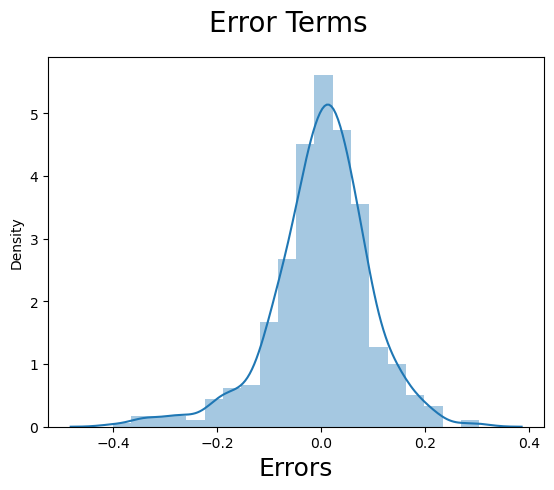

In [73]:
#Evaluation of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

## Applying the scaling on the test sets

In [74]:
varlist =  ['yr', 'mnth', 'holiday', 'weekday', 'workingday','temp', 'atemp', 'hum', 'windspeed', 'Season_1', 'Season_2', 'weathersit_2','weathersit_3','cnt']

bb_final_test[varlist] = scaler.transform(bb_final_test[varlist])

## Dividing into X_test and y_test

In [75]:
y_test = bb_final_test.pop('cnt')
X_test = bb_final_test

In [76]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [77]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

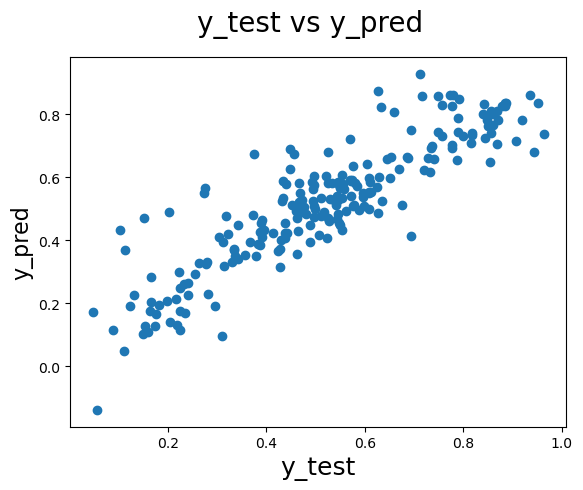

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## Exploratory data analysis

In [79]:
# Rename the columns in boombikes_eda
boombikes_eda.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather', 'dteday': 'date', 'cnt': 'count'}, inplace=True)

# Replacing numerical values with categorical values for exploratory data analysis
boombikes_eda ['season'] = boombikes_eda ['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
boombikes_eda ['year'] = boombikes_eda ['year'].replace({0: '2018', 1: '2019'})
boombikes_eda ['month'] = boombikes_eda ['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
boombikes_eda ['weekday'] = boombikes_eda ['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
boombikes_eda ['weather'] = boombikes_eda ['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Snow'})

# Verify the changes
boombikes_eda.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,01-01-2018,spring,2018,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [80]:
# creating list of columns containing integer dtypes
numerical = boombikes_eda.select_dtypes(include=['int','float'])
final_numerical = numerical.columns.tolist()
print("Numerical Columns:" , final_numerical)

# creating list of columns containing strng or object dtypes
category = boombikes_eda.select_dtypes(include=['object'])
final_categorical = category.columns.tolist()
print("Category Columns:", final_categorical)

Numerical Columns: ['instant', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']
Category Columns: ['date', 'season', 'year', 'month', 'weekday', 'weather']


In [81]:
# Converting the 'dteday' column to datetime format
boombikes_eda['date'] = pd.to_datetime(boombikes_eda['date'], format='%d-%m-%Y')

# Checking the data types to dataframe
print(boombikes_eda.dtypes)

instant                int64
date          datetime64[ns]
season                object
year                  object
month                 object
holiday                int64
weekday               object
workingday             int64
weather               object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


## Univariate analysis

Countplot of season


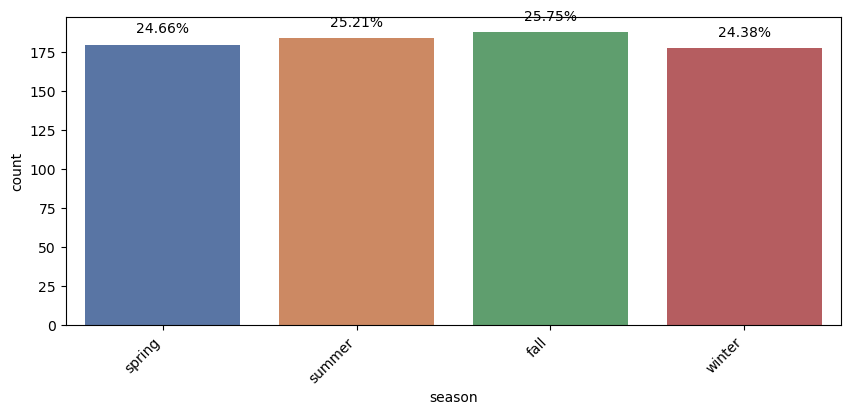

Countplot of year


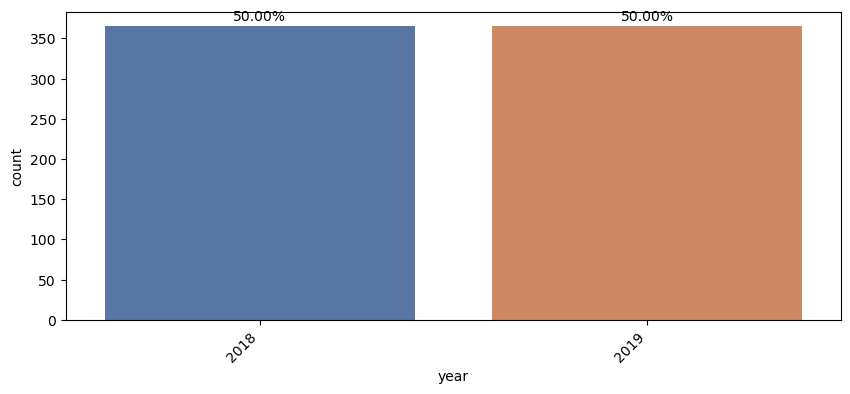

Countplot of month


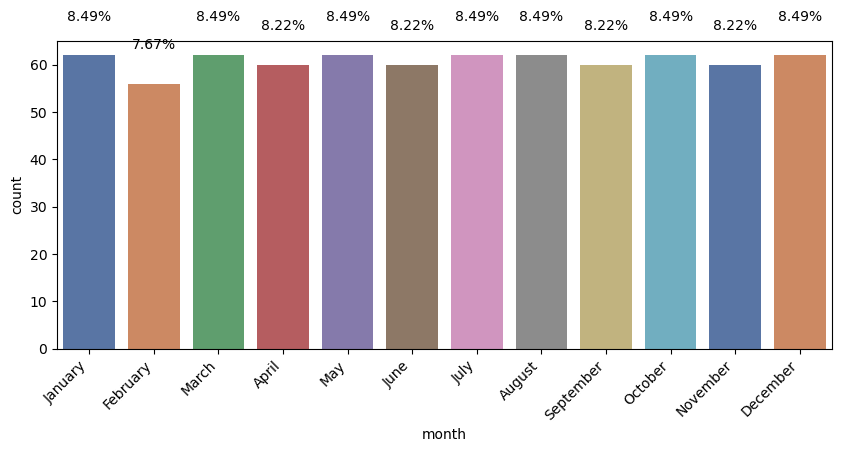

Countplot of weekday


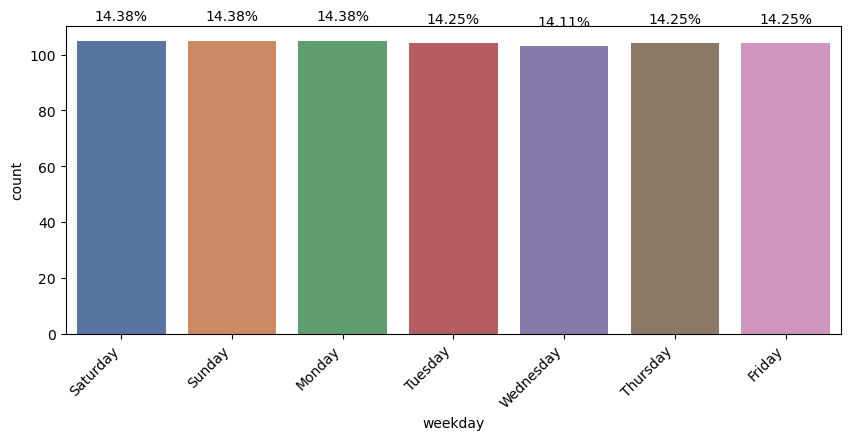

Countplot of weather


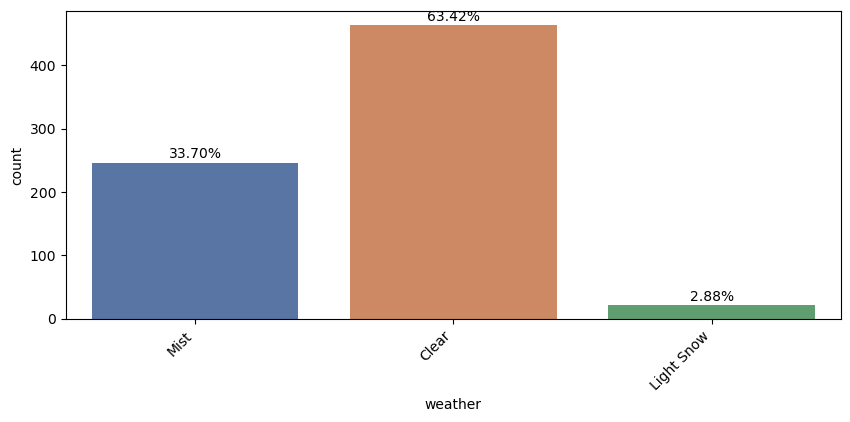

In [82]:
# List of columns for numerical and categorical analysis
numerical_columns = ['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']
category_columns = ['season', 'year', 'month', 'weekday', 'weather']

#Performing univariate analysis
for i in category_columns:
    plt.figure(figsize=(10, 4))
    print("Countplot of", i)
    
    unique_values = boombikes_eda[i].unique()
    palette = sns.color_palette("deep", len(unique_values))
    
    ax = sns.countplot(x=boombikes_eda[i], palette=palette)
    
    total = float(len(boombikes_eda[i]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + total * 0.01,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()

## Bivariate analysis
From the data and univariate analysis follwing is understood:
1. that holiday do not have any impact on use bikes
2. year do not have any difference on use of bikes
3. workingday do not have impact on use of bikes
4. temp and atemp has similar data trends and hence we can drop temp

#and hence we can remove holiday from the analysis

Boxplot of season vs casual


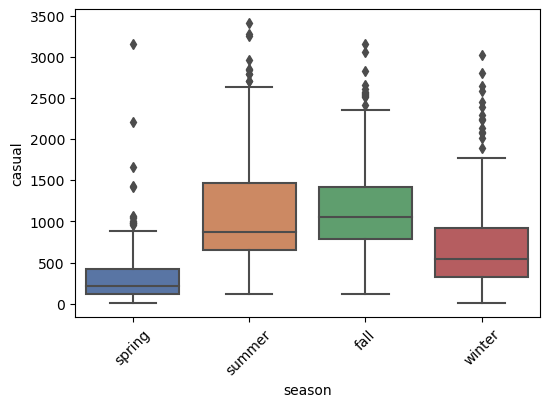

Boxplot of season vs registered


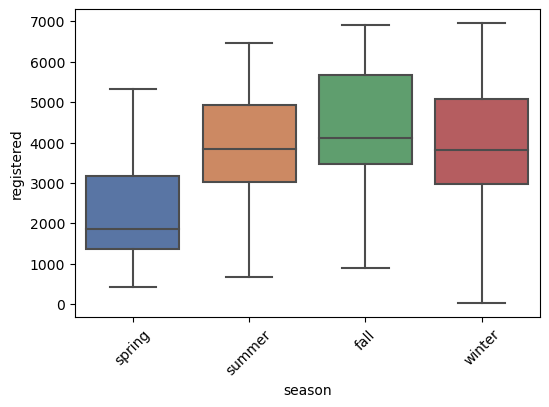

Boxplot of season vs count


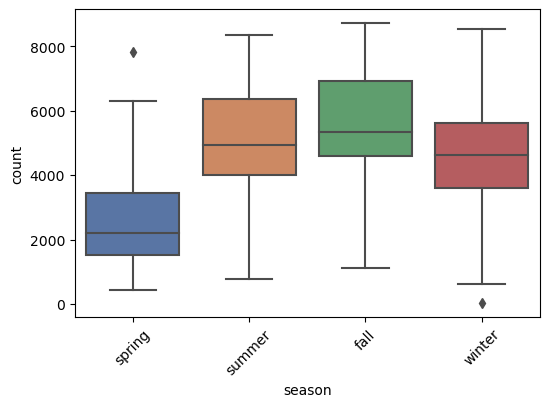

Boxplot of month vs casual


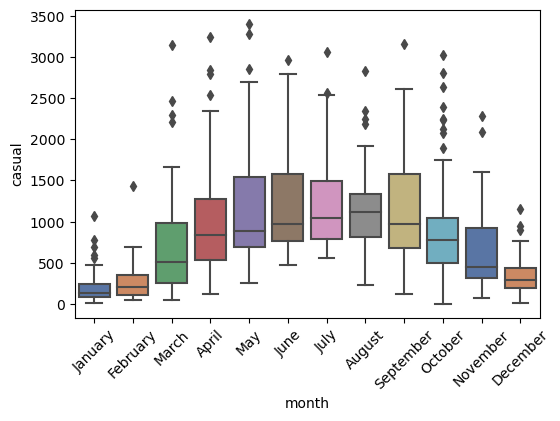

Boxplot of month vs registered


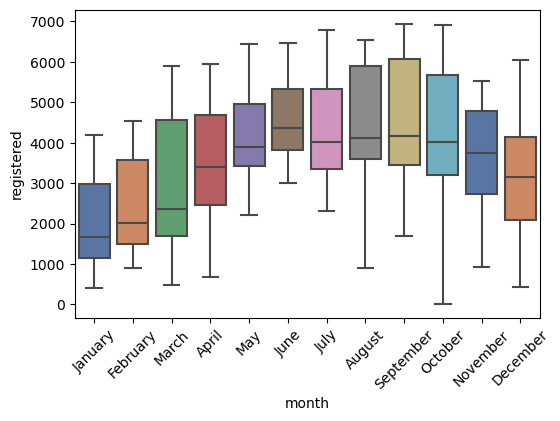

Boxplot of month vs count


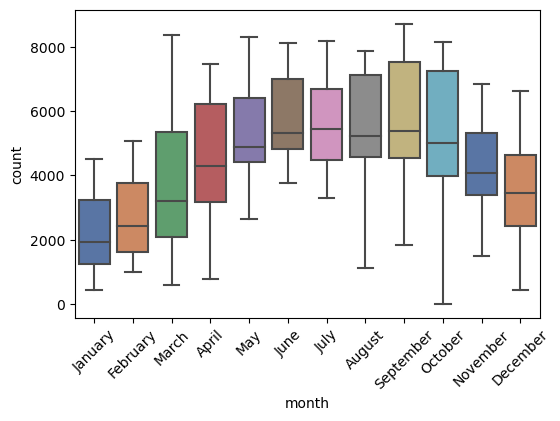

Boxplot of weekday vs casual


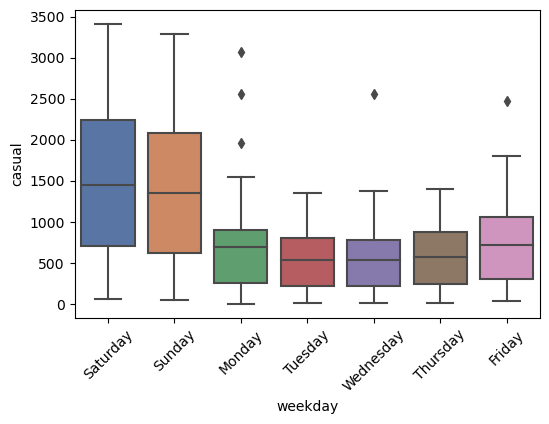

Boxplot of weekday vs registered


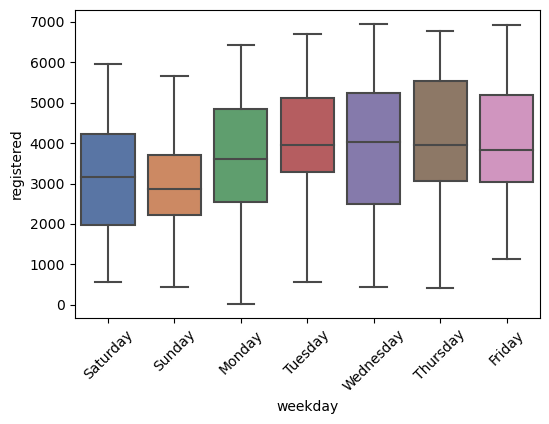

Boxplot of weekday vs count


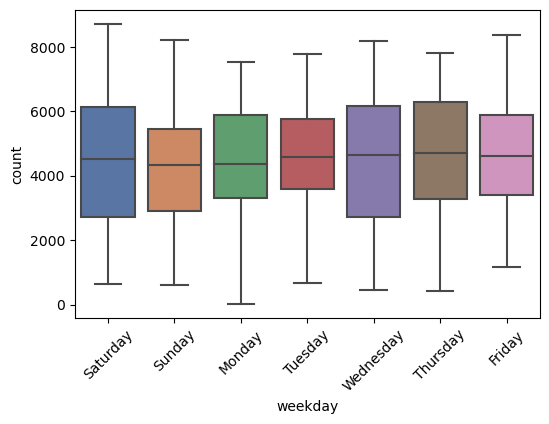

Boxplot of weather vs casual


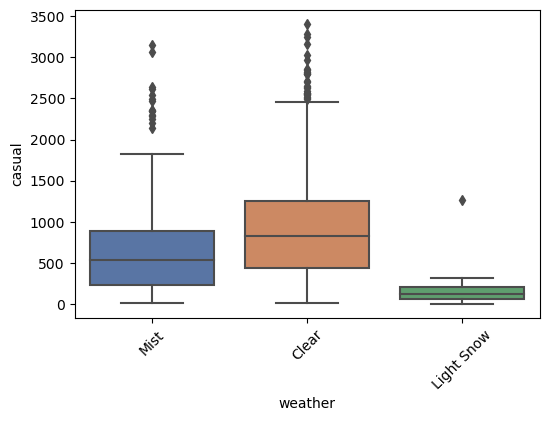

Boxplot of weather vs registered


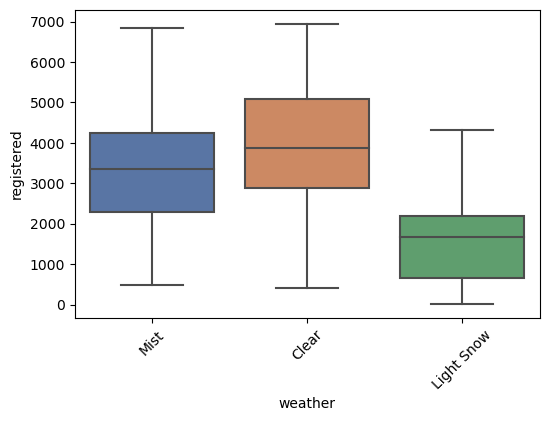

Boxplot of weather vs count


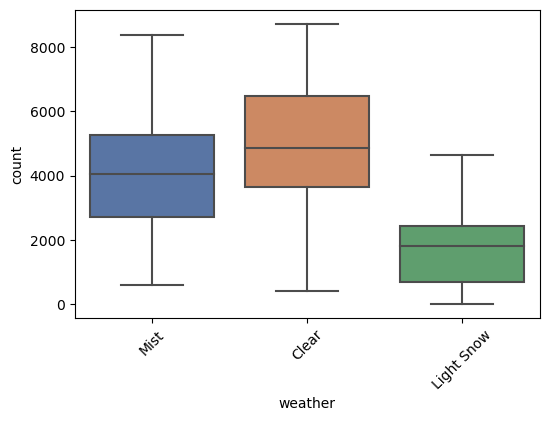

In [83]:
# Selecting numerical data for comparative analysis
numerical_col = ['casual', 'registered', 'count']
category_col = ['season', 'month', 'weekday', 'weather']

# List of available palettes
palettes = ['deep']

# Iterating data over category and numerical columns
# performing categorical analysis of data
for col1 in category_col:
    for col2 in numerical_col:
        print("Boxplot of", col1, "vs", col2)
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=boombikes_eda[col1], y=boombikes_eda[col2], palette=palettes[0])
        plt.xticks(rotation=45)
        plt.show()

## Correlation analysis

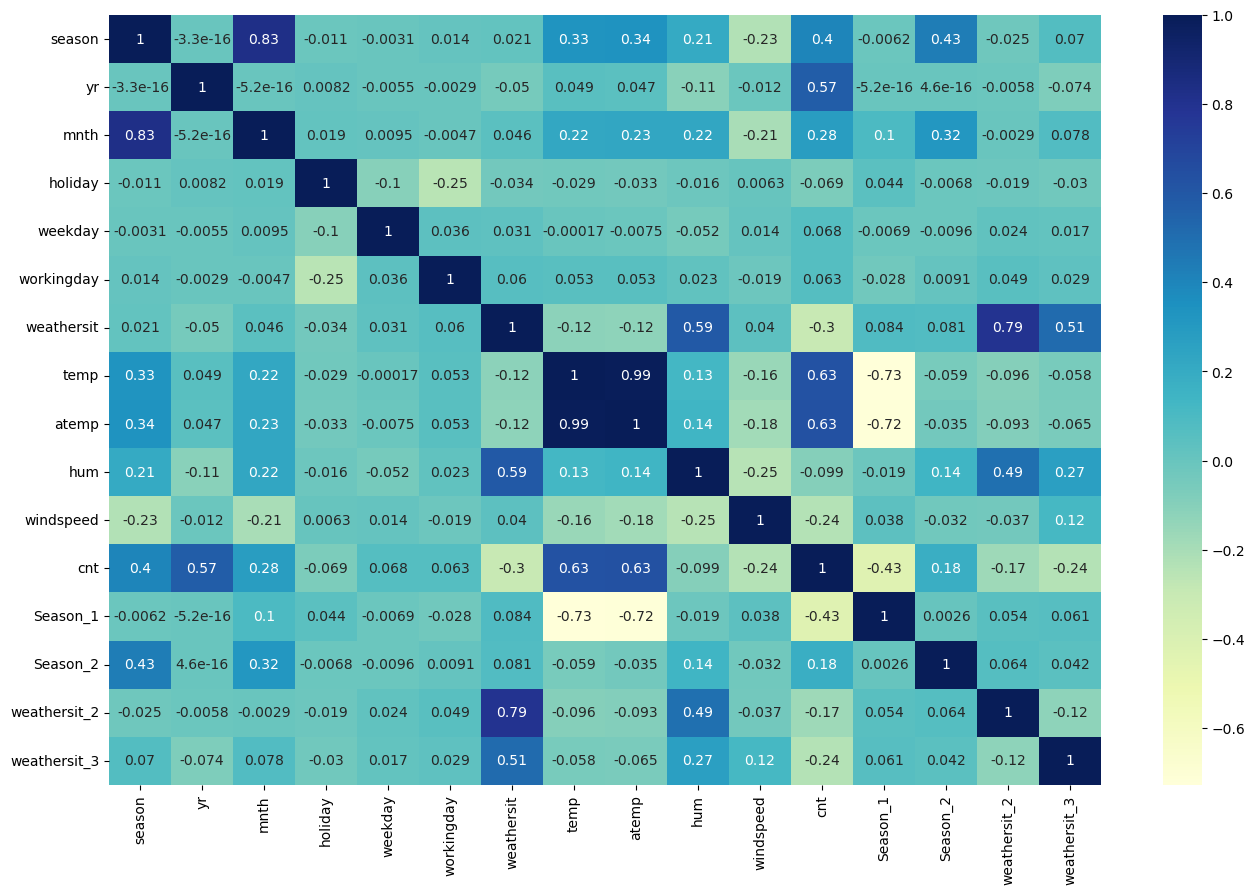

In [84]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(boombikes_lr.corr(), annot = True, cmap="YlGnBu")
plt.show()


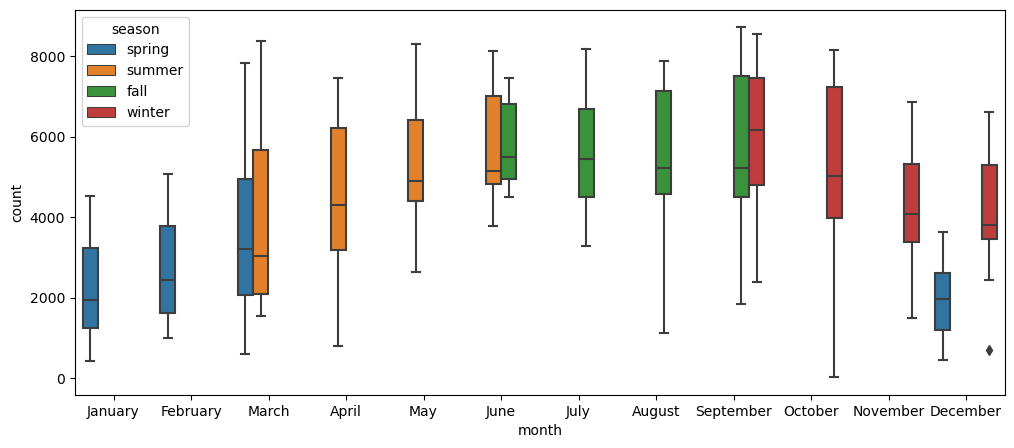

In [85]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'month', y = 'count', hue = 'season', data = boombikes_eda)
plt.show()

## Time Frame analysis

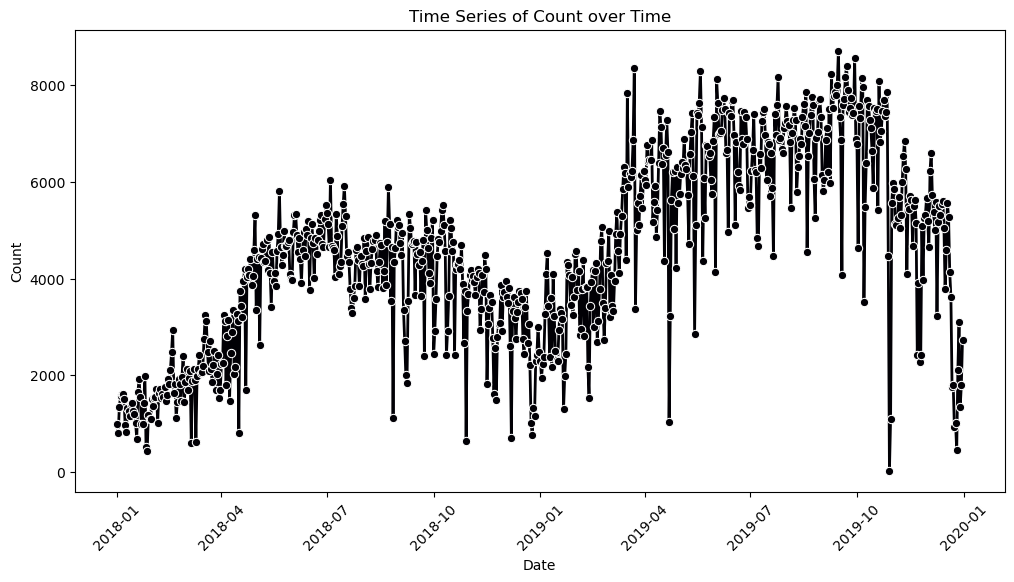

In [86]:
palette = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='count', data=boombikes_eda,color=palette(1), marker='o', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Count over Time')
plt.xticks(rotation=45)
plt.show()

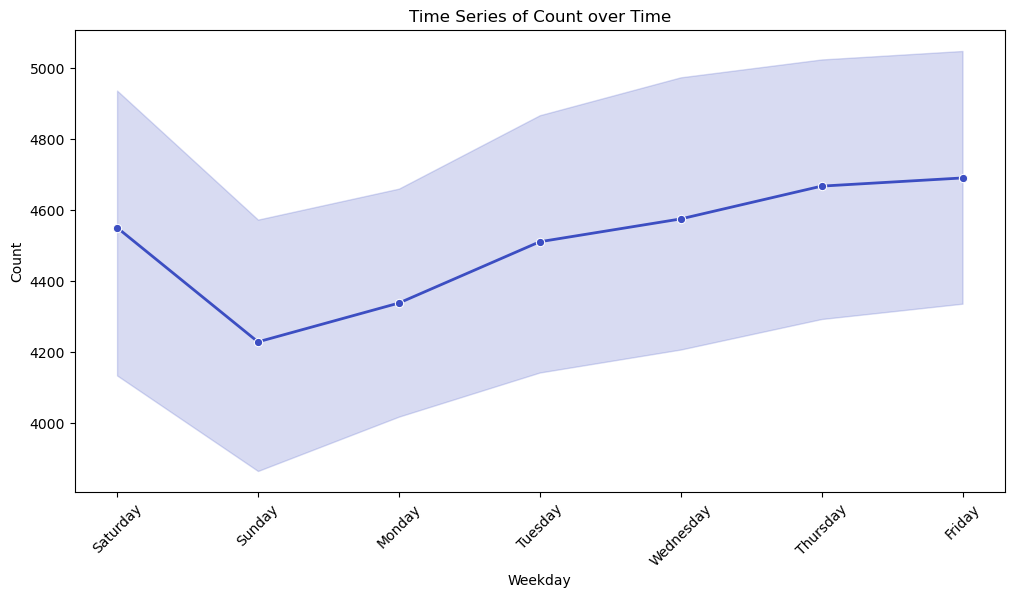

In [87]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='count', data=boombikes_eda,color=palette(1), marker='o', linewidth=2)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Time Series of Count over Time')
plt.xticks(rotation=45)
plt.show()

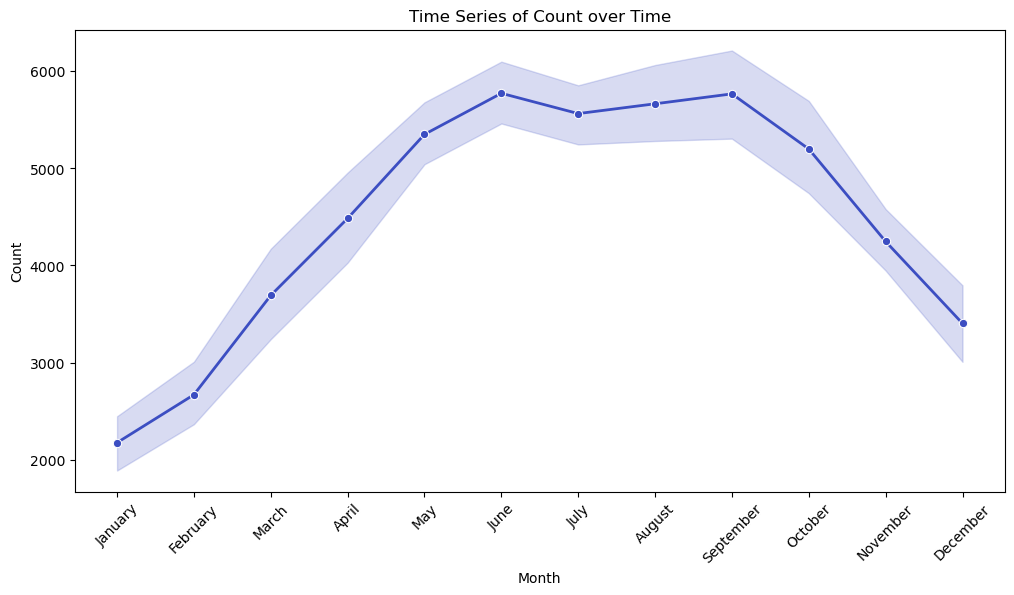

In [88]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', data=boombikes_eda, color=palette(1), marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Time Series of Count over Time')
plt.xticks(rotation=45)
plt.show()